# Tutorial 3 - Fundamental ML Algorithms Part I

In [82]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as LR
from sklearn import tree
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# import graphviz

### 1. Linear Regression

We wish the predict the energy output of a certain date, given information on current temperature and pressure readings

In [2]:
# Load dataset for linear regression, and inspect it

df_energy = pd.read_csv('energydata.csv')
df_energy.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
# Remove date column, rv1, and rv2 columns 
df_energy.drop('date', axis=1, inplace=True) # axis=1 to indicate we're dropping a column, inplace means to not make a copy
df_energy.drop('rv1', axis=1, inplace=True)
df_energy.drop('rv2', axis=1, inplace=True)
df_energy.head(5)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


In [4]:
# Sum appliances and lights for total energy
df_energy['energy'] = df_energy['Appliances'] + df_energy['lights']
df_energy.head(5)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,energy
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,90
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,90
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,80
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,90
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,100


In [5]:
# Then drop appliances and lights, as they are now redundant features

df_energy.drop('Appliances', axis=1, inplace=True)
df_energy.drop('lights', axis=1, inplace=True)
df_energy.head(5)

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,energy
0,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,...,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,90
1,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,...,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,90
2,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,...,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,80
3,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,...,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,90
4,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,...,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,100


In [6]:
# Split the dataset into features and labels for training, testing

df_energy_X = df_energy.drop('energy', axis=1)
df_energy_y = df_energy['energy']
df_energy_X.head(5)

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


In [7]:
df_energy_y.head(5)

0     90
1     90
2     80
3     90
4    100
Name: energy, dtype: int64

In [8]:
# Method that takes in dataframe, and degree of polynomial
# Outputs polynomial form of dataframe

def PF(X, degree):
    X = np.asarray(X)
    tmp_raise = X
    for i in range(2, degree+1):
        tmp_raise = np.append(tmp_raise, np.power(X, i), axis=1)
    X = tmp_raise
    finalarr = np.ones((X.shape[0], X.shape[1]+1))
    finalarr[:,:-1] = X
    return finalarr

In [9]:
# Do 60-20-20 train_test_split for training set, validation set, and test set

def split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42)

    X_val, X_test, y_val, y_test = train_test_split(
        X_test, y_test, test_size=0.5, random_state=42)

    #print('X_train percentage: {}, X_val percentage: {}, X_test percentage: {}'
    #     .format(len(X_train)/len(X), 
    #             len(X_val)/len(X), 
    #             len(X_test)/len(X)))
    return X_train, X_val, X_test, y_train, y_val, y_test

In [50]:
validation_acc = []

# For different polynomial bases, fit phi(x) into linear regression model, then compute R^2 = 1 - Rss/Rtot
degree = 10
for i in range(1,degree +1):
    X_poly = PF(df_energy_X, i)
    X_train, X_val, X_test, y_train, y_val, y_test = split(X_poly, df_energy_y)
    LR_model = LR()
    LR_model.fit(X_train, y_train)
    print('Training set R^2 for degree {}: {}'.format(i, 
                                                       np.round(LR_model.score(X_train, y_train), 4)))
    print('Validation set R^2 for degree {}: {} \n'. format(i,
                                                         np.round(LR_model.score(X_val, y_val),4)))
    validation_acc.append(np.round(LR_model.score(X_val, y_val),4))

Training set R^2 for degree 1: 0.2475
Validation set R^2 for degree 1: 0.2318 

Training set R^2 for degree 2: 0.2348
Validation set R^2 for degree 2: 0.2285 

Training set R^2 for degree 3: 0.2153
Validation set R^2 for degree 3: 0.2108 

Training set R^2 for degree 4: 0.2116
Validation set R^2 for degree 4: 0.2067 

Training set R^2 for degree 5: 0.2115
Validation set R^2 for degree 5: 0.2067 

Training set R^2 for degree 6: 0.2115
Validation set R^2 for degree 6: 0.2067 

Training set R^2 for degree 7: 0.2115
Validation set R^2 for degree 7: 0.2067 

Training set R^2 for degree 8: 0.2115
Validation set R^2 for degree 8: 0.2067 

Training set R^2 for degree 9: 0.2115
Validation set R^2 for degree 9: 0.2067 

Training set R^2 for degree 10: 0.2115
Validation set R^2 for degree 10: 0.2067 



In [51]:
validation_acc

[0.23180000000000001,
 0.22850000000000001,
 0.21079999999999999,
 0.20669999999999999,
 0.20669999999999999,
 0.20669999999999999,
 0.20669999999999999,
 0.20669999999999999,
 0.20669999999999999,
 0.20669999999999999]

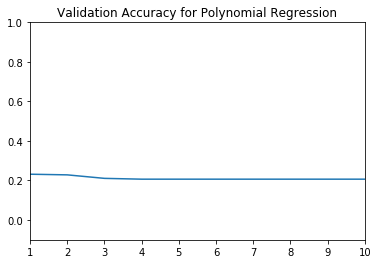

In [65]:
# Display validation R^2 for polynomials from degree 1 to 15

plt.plot([i+1 for i in range(len(validation_acc))], validation_acc)
plt.axis([1, degree, -0.1, 1]), plt.title('Validation Accuracy for Polynomial Regression')
plt.show()

### 2. Logistic Regression and Decision Trees on the MNIST Handwritten Digits Dataset

### MNIST Dataset
The Mnist Dataset is too large to be on github, you can download it here: https://pjreddie.com/media/files/mnist_train.csv

In [53]:
np_mnist = np.loadtxt(open("mnist_train.csv", "rb"), delimiter=",", skiprows=1)

In [54]:
# Convert to pandas dataframe for easier manipulation
df_mnist = pd.DataFrame(np_mnist)
df_mnist.shape

(59999, 785)

In [55]:
df_mnist.rename(columns={0: 'label'}, inplace=True)
df_mnist.head(5)

,label,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# Separate features and labels
df_mnist_X = df_mnist.drop('label', axis=1)
df_mnist_y = df_mnist['label']

In [70]:
# Use previous split helper method to split data in train, val, test sets
X_train, X_val, X_test, y_train, y_val, y_test = split(df_mnist_X, df_mnist_y)

#### We attempt to classify the different digits in MNIST using logistic regression

In [74]:
# When initializing, need to change optimization method for multiclass labels

LRmodel = LogReg(solver='lbfgs')
LRmodel.fit(X_train, y_train)
print('Logistic Regression Training Accuracy: {}'.format(np.round(LRmodel.score(X_train, y_train), 5)))
print('Logistic Regression Validation Accuracy: {}'.format(np.round(LRmodel.score(X_val, y_val), 5)))

Logistic Regression Training Accuracy: 0.93047
Logistic Regression Validation Accuracy: 0.91


In [75]:
# Cross validation code that we won't run now, but you can try it in your own time
# This should take approximately 10 minutes to run (go grab dinner in between?)
# Recalling that C is inversely proportional to regularization strength

'''
for i in range(0.3, 1.3, 0.1):
    LRmodel = LR(C=i, solver='lbfgs')
    LRmodel.fit(X_train, y_train)
    print('Logistic Regression Training Accuracy with C = {}: {}'
         .format(i, LRmodel.score(X_train, y_train)))
    print('Logistic Regression Validation Accuracy with C = {}: {}'
         .format(i, LRmodel.score(X_val, y_val)))
'''


    

"\nfor i in range(0.3, 1.3, 0.1):\n    LRmodel = LR(C=i, solver='lbfgs')\n    LRmodel.fit(X_train, y_train)\n    print('Logistic Regression Training Accuracy with C = {}: {}'\n         .format(i, LRmodel.score(X_train, y_train)))\n    print('Logistic Regression Validation Accuracy with C = {}: {}'\n         .format(i, LRmodel.score(X_val, y_val)))\n"

In [76]:
df_iris = pd.read_csv('iris.csv')
df_iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [77]:
df_iris_X = df_iris.drop('species', axis=1)
df_iris_y = df_iris['species']
X_train, X_val, X_test, y_train, y_val, y_test = split(df_iris_X, df_iris_y)

In [78]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [79]:
clf = clf.fit(X_train, y_train)
print('Decision Tree train set accuracy: {}'.format(clf.score(X_train, y_train)))
print('Decision Tree validation set accuracy: {}'.format(clf.score(X_val, y_val)))

Decision Tree train set accuracy: 1.0
Decision Tree validation set accuracy: 1.0


In [64]:
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                          feature_names=df_iris_X.columns,  
#                          class_names=df_iris_y,  
#                          filled=True, rounded=True,  
#                          special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph 

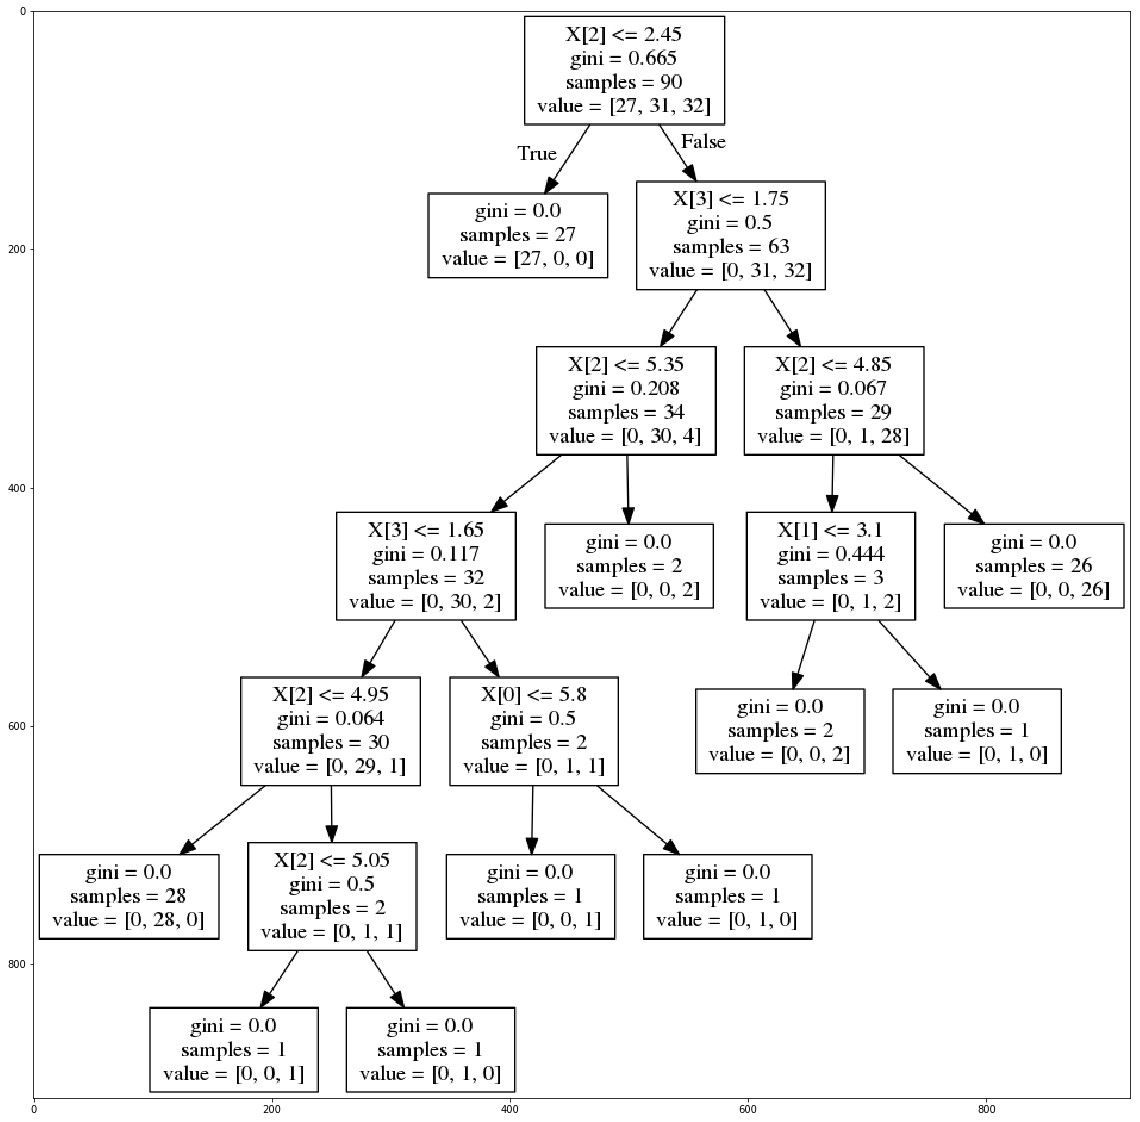

In [84]:
img_tree = mpimg.imread('tree.png')

plt.figure(figsize=(20,20))
plt.imshow(img_tree)

In [86]:
clf.score(X_test, y_test)

0.96666666666666667